# ..TESTING MY HYPOTHESIS

It is known that sharks do not attack so much, but, ideed, even when it happens, they do not attack to death. And here is the first hypothesis I am going to test.

Secondly, it has been reported that most victims of shark attacks were engaged in activities such as surfing, water skiing and boating, so I want to test whether the injuries that result from these attacks were mainly on lower limbs

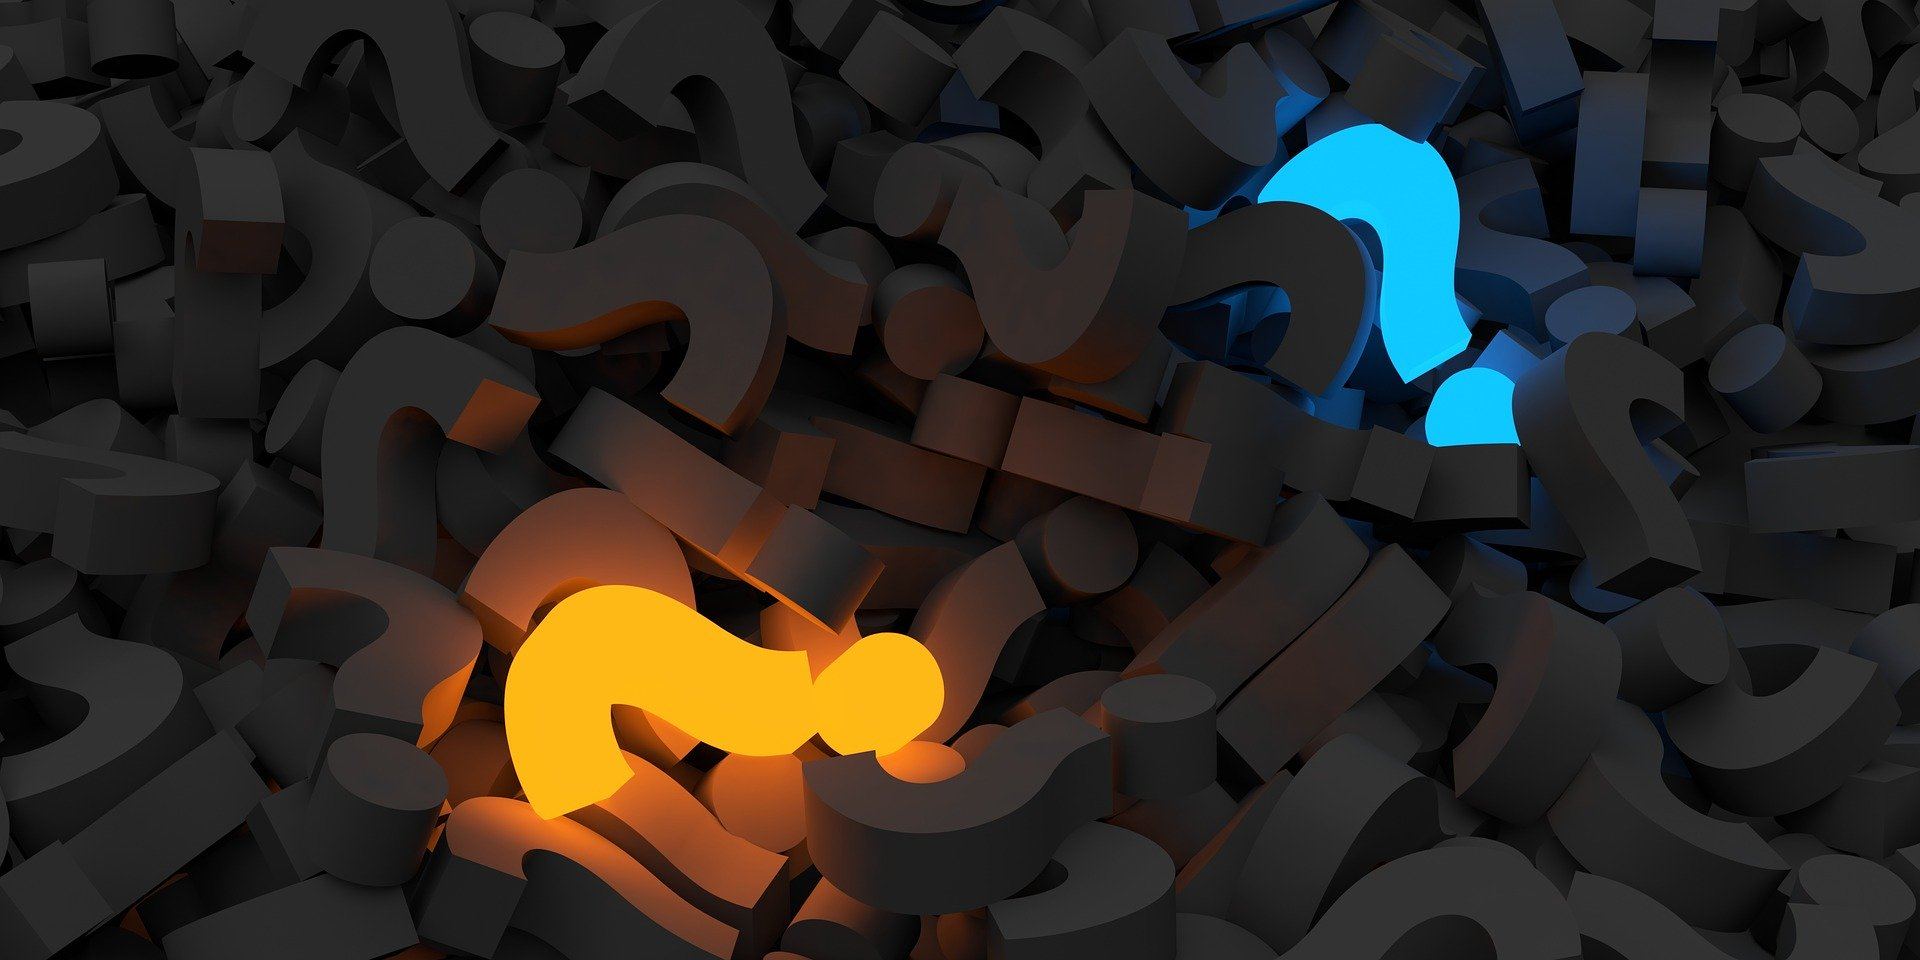

For this study I have two main hypothesis, although to test them I need to check other variables:

- Most attacks are not lethal. 

- There are some activities, such as surfing in which attacks occur more frequently, and most injuries are in lower limbs.


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
from Operaciones import *

attacks = pd.read_csv("OUTPUT/attacks_clean.csv")

In [2]:
attacks

,Unnamed: 0,Country,Fatal,Injury_type,Activity_type
0,0,USA,N,No harm,In kayak or canoe
1,1,USA,N,Lower limbs,Sole cases or undescribed activities
2,2,USA,N,Lower limbs,Surfing
3,3,AUSTRALIA,N,Lower limbs,Surfing
4,4,MEXICO,N,Lower limbs,Diving
...,...,...,...,...,...
5677,6297,AUSTRALIA,Y,Fatal,Diving
5678,6298,AUSTRALIA,Y,Fatal,Diving
5679,6299,USA,Y,Fatal,Swimming
5680,6300,PANAMA,Y,Fatal,Sole cases or undescribed activities


In [3]:
attacks.columns

Index(['Unnamed: 0', 'Country', 'Fatal', 'Injury_type', 'Activity_type'], dtype='object')

In [4]:
attacks = attacks.drop(columns= ["Unnamed: 0"])

In [5]:
attacks.columns

Index(['Country', 'Fatal', 'Injury_type', 'Activity_type'], dtype='object')

In [6]:
hola = attacks.Country.value_counts()

In [7]:
hola = dict(hola)

In [8]:
counts= pd.DataFrame.from_dict(hola, orient="index").reset_index()

In [9]:
counts.columns = ["Country", "Counts"]

In [10]:
counts

,Country,Counts
0,USA,2100
1,AUSTRALIA,1198
2,SOUTH AFRICA,528
3,PAPUA NEW GUINEA,124
4,NEW ZEALAND,116
...,...,...
197,ALGERIA,1
198,Sierra Leone,1
199,TASMAN SEA,1
200,NORTH SEA,1


In [11]:
counts.columns

Index(['Country', 'Counts'], dtype='object')

In [12]:
counts.head(10)

,Country,Counts
0,USA,2100
1,AUSTRALIA,1198
2,SOUTH AFRICA,528
3,PAPUA NEW GUINEA,124
4,NEW ZEALAND,116
5,BAHAMAS,104
6,BRAZIL,93
7,MEXICO,84
8,ITALY,58
9,FIJI,57


In [13]:
counts2 = counts.loc[counts["Counts"] <= 50]


In [14]:
counts2['Counts'].sum()

1167

In [15]:
counts.drop(counts[counts.Counts <=50].index, inplace=True)
counts

,Country,Counts
0,USA,2100
1,AUSTRALIA,1198
2,SOUTH AFRICA,528
3,PAPUA NEW GUINEA,124
4,NEW ZEALAND,116
5,BAHAMAS,104
6,BRAZIL,93
7,MEXICO,84
8,ITALY,58
9,FIJI,57


In [16]:
new_row = {'Country':'Other Countries', 'Counts': counts2['Counts'].sum()}
#append row to the dataframe
counts = counts.append(new_row, ignore_index=True)

In [17]:
counts


,Country,Counts
0,USA,2100
1,AUSTRALIA,1198
2,SOUTH AFRICA,528
3,PAPUA NEW GUINEA,124
4,NEW ZEALAND,116
5,BAHAMAS,104
6,BRAZIL,93
7,MEXICO,84
8,ITALY,58
9,FIJI,57


In [19]:
fig = px.pie(counts, values="Counts", names = "Country", title='Distribution of attacks by countries')

fig.show()

In [20]:
pd.set_option('display.max_rows', None)
attacks.head()

,Country,Fatal,Injury_type,Activity_type
0,USA,N,No harm,In kayak or canoe
1,USA,N,Lower limbs,Sole cases or undescribed activities
2,USA,N,Lower limbs,Surfing
3,AUSTRALIA,N,Lower limbs,Surfing
4,MEXICO,N,Lower limbs,Diving


In [21]:
round(attacks['Country'].value_counts(normalize=True) * 100).head()


USA                 37.0
AUSTRALIA           21.0
SOUTH AFRICA         9.0
PAPUA NEW GUINEA     2.0
NEW ZEALAND          2.0
Name: Country, dtype: float64

In [22]:
round(attacks['Fatal'].value_counts(normalize=True) * 100)


N          77.0
Y          23.0
UNKNOWN     0.0
Name: Fatal, dtype: float64

In [23]:
fatality = attacks.Fatal.value_counts()
fatality = dict(fatality) 
survivalrate = pd.DataFrame.from_dict(fatality, orient="index").reset_index() 
survivalrate.columns = ["Fatal", "yesno"]
survivalrate.drop(survivalrate[survivalrate.yesno <=10].index, inplace=True)
survivalrate


,Fatal,yesno
0,N,4352
1,Y,1323


In [24]:
fig2= px.pie(survivalrate, values="yesno", names = "Fatal", title='Fatal attacks')
fig2.show()

In [25]:
round(attacks['Activity_type'].value_counts(normalize=True) * 100)


Swimming                                29.0
Surfing                                 24.0
Sole cases or undescribed activities    19.0
Diving                                  10.0
Fishing                                 10.0
Shark fishing                            3.0
In kayak or canoe                        2.0
Boating                                  2.0
Playing                                  0.0
Sailing                                  0.0
Skiing                                   0.0
Name: Activity_type, dtype: float64

In [26]:
round(attacks['Injury_type'].value_counts(normalize=True) * 100)


Lower limbs    39.0
Fatal          24.0
No harm        15.0
Upper limbs    14.0
Minor           3.0
Severe          3.0
Bitten          1.0
Lacerations     1.0
Abrasions       0.0
Name: Injury_type, dtype: float64

In [27]:
attacks.head()

,Country,Fatal,Injury_type,Activity_type
0,USA,N,No harm,In kayak or canoe
1,USA,N,Lower limbs,Sole cases or undescribed activities
2,USA,N,Lower limbs,Surfing
3,AUSTRALIA,N,Lower limbs,Surfing
4,MEXICO,N,Lower limbs,Diving


In [28]:
attacks.columns


Index(['Country', 'Fatal', 'Injury_type', 'Activity_type'], dtype='object')

In [29]:
attacks["Injury_Activity"] = attacks.apply(lambda row: Activity_injury(row["Activity_type"], row["Injury_type"]), axis = 1)

In [30]:
attacks.head()




,Country,Fatal,Injury_type,Activity_type,Injury_Activity
0,USA,N,No harm,In kayak or canoe,mix
1,USA,N,Lower limbs,Sole cases or undescribed activities,mix
2,USA,N,Lower limbs,Surfing,Surf_Lower
3,AUSTRALIA,N,Lower limbs,Surfing,Surf_Lower
4,MEXICO,N,Lower limbs,Diving,Divi_Lower


In [31]:
tochart = round(attacks['Injury_Activity'].value_counts(normalize=True) * 100)

tochart = dict(tochart)

injuriesbyactivity = pd.DataFrame.from_dict(tochart, orient="index").reset_index() 
injuriesbyactivity.columns = ["Injury_Activity", "Counts"]
injuriesbyactivity


,Injury_Activity,Counts
0,mix,33.0
1,Surf_Lower,13.0
2,Swim_Lower,12.0
3,Swim_Death,10.0
4,Surf_Noharm,4.0
5,Swim_Upper,4.0
6,Fish_Noharm,3.0
7,SurfUpper,3.0
8,Fish_Lower,3.0
9,Divi_Lower,3.0


In [32]:
toplot = injuriesbyactivity[injuriesbyactivity.Injury_Activity != 'mix']

In [33]:

fig3 = px.bar(toplot, x='Injury_Activity', y='Counts',
             labels={'Counts':'Percentage of injuries per sport'}, height=600)
fig3.show()